In [1]:
import numpy as np
import scipy as sc
import scipy.spatial
import matplotlib.pyplot as plt
import scipy.signal as sig

<IPython.core.display.Javascript object>


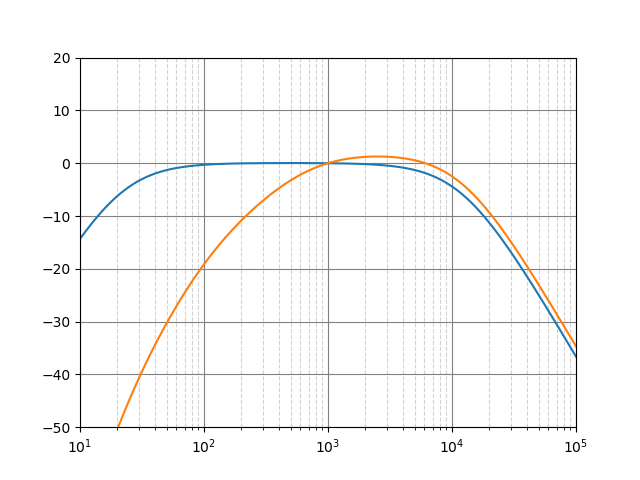

In [2]:
%matplotlib notebook
f=np.logspace(0,5,1000)
plt.semilogx(f,20*np.log10(((12194**2)*(f**2))/((f**2+20.6**2)*(f**2+12194**2)))+0.06)
plt.semilogx(f,20*np.log10(((12194**2)*(f**4))/((f**2+20.6**2)*np.sqrt((f**2+107.7**2)*(f**2+737.9**2))*(f**2+12194**2)))+2.00)
plt.ylim(-50,20)
plt.xlim(10,100e3)
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

In [ ]:
129.4/48000

In [ ]:
76655/48000/np.pi

In [ ]:
76655/2/np.pi

In [ ]:
aC1=np.convolve([1,129.4],[1,129.4])
aC2=np.convolve([1,76655],[1,76655])
AC=np.convolve(aC1,aC2)
BC=[5.91797e9,0,0]
AC

In [ ]:
aA1=np.convolve([1,129.4],[1,129.4])
aA2=np.convolve([1,76655],[1,76655])
aA3=[1,676.7]
aA4=[1,4636]
AA=np.convolve(np.convolve(aA3,aA4),np.convolve(aA1,aA2))
BA=[7.39705e9,0,0,0,0]
AA

In [ ]:
%matplotlib notebook
fqz=2*np.pi*np.logspace(0, np.log10(24000), 1024)
w,h = sig.freqs(BA,AA,worN=fqz)
plt.semilogx(w/2/np.pi, 20 * np.log10(abs(h)))
b,a=sig.bilinear(BA, AA, fs=48000)
wz, hz = sig.freqz(b,a,fqz/48000)
plt.semilogx(wz/2/np.pi*48000, 20 * np.log10(abs(hz)))

w,h = sig.freqs(BC,AC,worN=fqz)
plt.semilogx(w/2/np.pi, 20 * np.log10(abs(h)))
b,a=sig.bilinear(BC, AC, fs=48000)
wz, hz = sig.freqz(b,a,fqz/48000)
plt.semilogx(wz/2/np.pi*48000, 20 * np.log10(abs(hz)))
plt.semilogx(f,20*np.log10(((12194**2)*(f**2))/((f**2+20.6**2)*(f**2+12194**2)))+0.06)
plt.semilogx(f,20*np.log10(((12194**2)*(f**4))/((f**2+20.6**2)*np.sqrt((f**2+107.7**2)*(f**2+737.9**2))*(f**2+12194**2)))+2.00)


plt.ylim(-50,20)
plt.xlim(10,100e3)
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

In [ ]:
%matplotlib notebook
fqz=2*np.pi*np.logspace(0, np.log10(24000), 1024)
w,h = sig.freqs(BC,AC,worN=fqz)
plt.semilogx(w/2/np.pi, 20 * np.log10(abs(h)))
b,a=sig.bilinear(BC, AC, fs=48000)
wz, hz = sig.freqz(b,a,fqz/48000)
plt.semilogx(wz/2/np.pi*48000, 20 * np.log10(abs(hz)))
plt.ylim(-50,20)
plt.xlim(10,100e3)
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

In [ ]:
a

In [ ]:
b

In [ ]:
t1=[1,107.7*np.pi*2]
t2=[1,737.9*np.pi*2]
T1=np.convolve(t1,t1)
t=np.convolve(np.convolve(t1,t1),np.convolve(t2,t2))

In [ ]:
sig.deconvolve(t,[1,5.313e3,np.sqrt(t[-1])])

In [ ]:
t

In [ ]:
np.sqrt(t[-1])

In [ ]:
def tfunc(x):
    g=x[0]+x[1]*1j
    r=np.convolve([1,g,np.sqrt(t[-1])],[1,g,np.sqrt(t[-1])])-t
    return (np.sum(np.abs(r)))

In [ ]:
res=sc.optimize.minimize(tfunc,[3000,2000])

In [ ]:
res.x

In [ ]:
tfunc([res.x[0],0])

In [ ]:
aT,np.convolve(aA3,aA4)